<h1>SP 500 companies Stocks Analysis</h1>

<h3>Importing Required resources</h3>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb
import numpy as np
df_companies= pd.read_csv('sp500_companies.csv')
df_stocks=pd.read_csv('sp500_stocks.csv')
df_index=pd.read_csv('sp500_index.csv')
df_index

,Date,S&P500
0,2014-12-22,2078.54
1,2014-12-23,2082.17
2,2014-12-24,2081.88
3,2014-12-26,2088.77
4,2014-12-29,2090.57
...,...,...
2512,2024-12-16,6074.08
2513,2024-12-17,6050.61
2514,2024-12-18,5872.16
2515,2024-12-19,5867.08


<h2>Data Cleaning</h2>

In [8]:
df_companies['Ebitda'].isna().sum()

#Although there are some null values in Ebitda column but lets not fill them for avoiding further anomalies


np.int64(29)

In [10]:
df_companies['Revenuegrowth'].isna().sum()
#Although there are some null values in Revenuegrowth column but lets not fill them for avoiding further anomalies

np.int64(3)

In [13]:
df_companies['Weight'].isna().sum()


np.int64(0)

In [15]:
df_stocks

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,04-01-2010,MMM,NaN,NaN,NaN,NaN,NaN,NaN
1,05-01-2010,MMM,NaN,NaN,NaN,NaN,NaN,NaN
2,06-01-2010,MMM,NaN,NaN,NaN,NaN,NaN,NaN
3,07-01-2010,MMM,NaN,NaN,NaN,NaN,NaN,NaN
4,08-01-2010,MMM,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1048570,31-03-2014,KLAC,NaN,NaN,NaN,NaN,NaN,NaN
1048571,01-04-2014,KLAC,NaN,NaN,NaN,NaN,NaN,NaN
1048572,02-04-2014,KLAC,NaN,NaN,NaN,NaN,NaN,NaN
1048573,03-04-2014,KLAC,NaN,NaN,NaN,NaN,NaN,NaN


However there are many null values in this dataframe but we need to ignore them because
Nulls can appear due to:

Trading suspensions
Extreme volatility halts
Mergers & restructuring

In [17]:
df_index

,Date,S&P500
0,2014-12-22,2078.54
1,2014-12-23,2082.17
2,2014-12-24,2081.88
3,2014-12-26,2088.77
4,2014-12-29,2090.57
...,...,...
2512,2024-12-16,6074.08
2513,2024-12-17,6050.61
2514,2024-12-18,5872.16
2515,2024-12-19,5867.08


<h2>Exploratory Data Analysis</h2>

<h3> 1. Compare sector-wise performance</h3>

In [28]:


# Merge sector info into stock data
df = df_stocks.merge(
    df_companies[['Symbol', 'Sector', 'Marketcap']],
    on='Symbol',
    how='left'
)

# Convert Date
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


In [31]:
df['Daily_Return'] = df.groupby('Symbol')['Adj Close'].pct_change(fill_method=None)


In [32]:
df = df.dropna(subset=['Daily_Return'])


In [33]:
sector_performance = (
    df.groupby('Sector')['Daily_Return']
      .agg(
          Avg_Daily_Return='mean',
          Daily_Risk='std'
      )
      .reset_index()
)

sector_performance['Annual_Return'] = sector_performance['Avg_Daily_Return'] * 252
sector_performance['Annual_Risk'] = sector_performance['Daily_Risk'] * np.sqrt(252)


In [34]:
risk_free_rate = 0.02  # 2% annual

sector_performance['Sharpe_Ratio'] = (
    sector_performance['Annual_Return'] - risk_free_rate
) / sector_performance['Annual_Risk']


In [39]:
df['Weighted_Return'] = df['Daily_Return'] * df['Marketcap']

sector_weighted = (
    df.groupby('Sector')
      .apply(lambda x: x['Weighted_Return'].sum() / x['Marketcap'].sum())
      .reset_index(name='Weighted_Daily_Return')
)

sector_weighted['Annual_Weighted_Return'] = sector_weighted['Weighted_Daily_Return'] * 252


C:\Users\Abhishek\AppData\Local\Temp\ipykernel_3588\1898565397.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x['Weighted_Return'].sum() / x['Marketcap'].sum())


In [40]:
final_sector_comparison = sector_performance.merge(
    sector_weighted[['Sector', 'Annual_Weighted_Return']],
    on='Sector',
    how='left'
)

final_sector_comparison.sort_values(
    by='Sharpe_Ratio',
    ascending=False,
    inplace=True
)

final_sector_comparison


,Sector,Avg_Daily_Return,Daily_Risk,Annual_Return,Annual_Risk,Sharpe_Ratio,Annual_Weighted_Return
7,Industrials,0.000822,0.020125,0.207201,0.319481,0.585952,0.204334
6,Healthcare,0.000763,0.020105,0.192395,0.319161,0.540151,0.196604
9,Technology,0.000969,0.026245,0.244285,0.416621,0.538342,0.231784
5,Financial Services,0.000683,0.017968,0.172131,0.285229,0.533363,0.174877
1,Communication Services,0.000606,0.017233,0.152588,0.273562,0.484673,0.195594
2,Consumer Cyclical,0.000771,0.022846,0.194204,0.362675,0.480331,0.280353
8,Real Estate,0.000619,0.017853,0.155964,0.283403,0.479754,0.174387
3,Consumer Defensive,0.000504,0.015236,0.127031,0.241868,0.442518,0.135602
10,Utilities,0.000427,0.015274,0.107607,0.242471,0.361308,0.113591
0,Basic Materials,0.000529,0.023310,0.133216,0.370036,0.305961,0.132731


<h2>Measure Risk Vs Return by sector</h2>

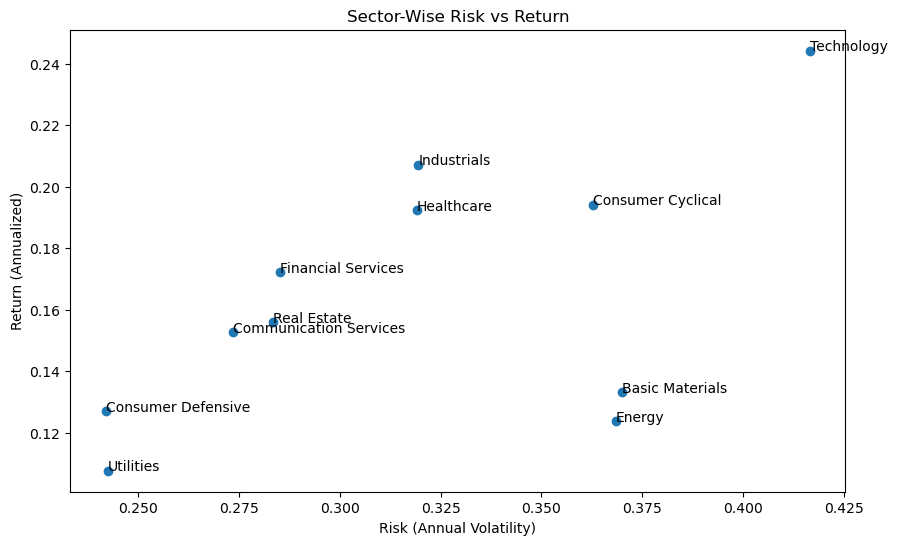

In [41]:
plt.figure(figsize=(10,6))
plt.scatter(
    final_sector_comparison['Annual_Risk'],
    final_sector_comparison['Annual_Return']
)

for i, sector in enumerate(final_sector_comparison['Sector']):
    plt.text(
        final_sector_comparison['Annual_Risk'].iloc[i],
        final_sector_comparison['Annual_Return'].iloc[i],
        sector
    )

plt.xlabel('Risk (Annual Volatility)')
plt.ylabel('Return (Annualized)')
plt.title('Sector-Wise Risk vs Return')
plt.show()

<h2>Study correlation between stocks</h2>

In [42]:
df_stocks['Date'] = pd.to_datetime(df_stocks['Date'], dayfirst=True)

In [48]:
#Calculate Daily Returns
df_stocks['Return'] = df_stocks.groupby('Symbol')['Adj Close'].pct_change(fill_method=None)
df_stocks = df_stocks.dropna(subset=['Return'])


In [47]:
returns_matrix = df_stocks.pivot(
    index='Date',
    columns='Symbol',
    values='Return'
)


In [49]:
correlation_matrix = returns_matrix.corr()


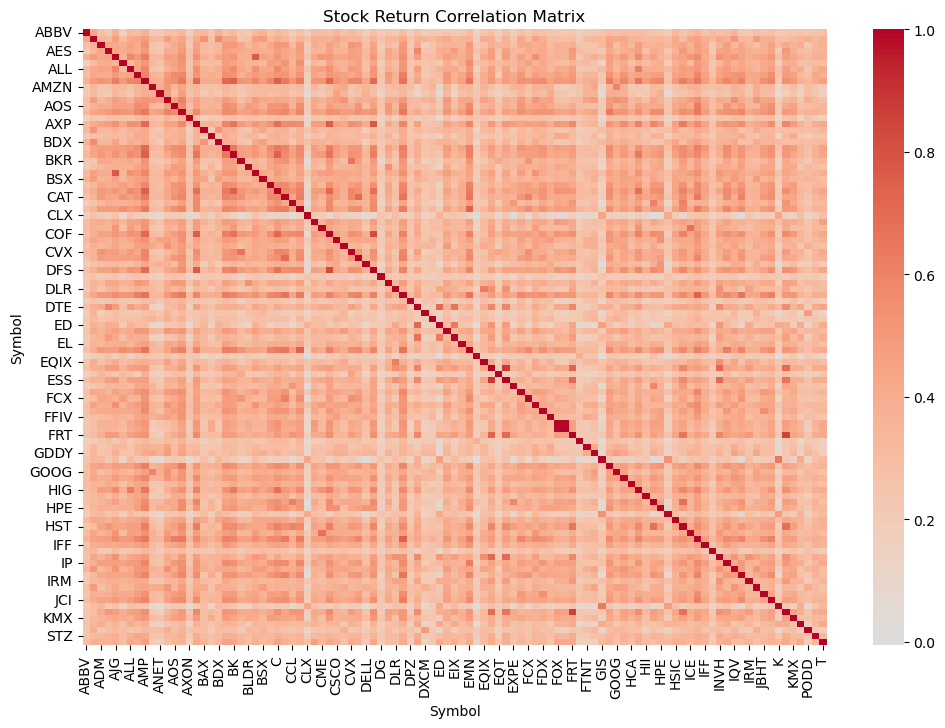

In [51]:
plt.figure(figsize=(12,8))
snb.heatmap(
    correlation_matrix,
    cmap='coolwarm',
    center=0
)
plt.title('Stock Return Correlation Matrix')
plt.show()

<h2>Evaluate portfolio diversification benefits</h2>

In [63]:
stocks['Symbol'].unique()[:20]


array(['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL',
       'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT',
       'ALL', 'GOOGL'], dtype=object)

In [64]:
set(['AAPL','MSFT','GOOGL','JNJ','XOM']) - set(stocks['Symbol'].unique())


{'MSFT'}

In [65]:
df_stocks[df_stocks['Symbol'].str.contains('GOOG', na=False)]['Symbol'].unique()


array(['GOOG'], dtype=object)

In [68]:
returns = df_stocks.pivot(
    index='Date',
    columns='Symbol',
    values='Return'
)


In [69]:
available_stocks = [s for s in portfolio_stocks if s in returns.columns]

returns = returns[available_stocks]


In [70]:
returns.columns


Index([], dtype='object', name='Symbol')

In [73]:
portfolio_stocks = ['AAPL', 'MSFT', 'GOOG', 'JNJ', 'XOM']

returns = df_stocks.pivot(
    index='Date',
    columns='Symbol',
    values='Return'
)

portfolio_stocks = [s for s in portfolio_stocks if s in returns.columns]

returns = returns[portfolio_stocks]
returns


Symbol,GOOG
Date,
2010-01-13,-0.005741
2010-01-14,0.004701
2010-01-15,-0.016700
2010-01-19,0.013138
2010-01-20,-0.012270
...,...
2024-12-16,0.035427
2024-12-17,-0.005248
2024-12-18,-0.035359


In [74]:
correlation = returns.corr()
correlation


Symbol,GOOG
Symbol,
GOOG,1.0


In [75]:
individual_risk = returns.std() * np.sqrt(252)


In [76]:
weights = np.array([1/len(portfolio_stocks)] * len(portfolio_stocks))

cov_matrix = returns.cov() * 252

portfolio_risk = np.sqrt(
    np.dot(weights.T, np.dot(cov_matrix, weights))
)

portfolio_risk


np.float64(0.2736224890643595)

In [77]:
avg_individual_risk = individual_risk.mean()

diversification_benefit = (
    avg_individual_risk - portfolio_risk
) / avg_individual_risk * 100

diversification_benefit


np.float64(-6.08624876790017e-14)

In [78]:
portfolio_return = returns.mean().dot(weights) * 252

risk_free_rate = 0.02

sharpe_ratio = (
    portfolio_return - risk_free_rate
) / portfolio_risk

sharpe_ratio


np.float64(0.6946251707103821)

In [79]:
companies = pd.read_csv('sp500_companies.csv')

sector_map = companies.set_index('Symbol')['Sector']

portfolio_sectors = sector_map[portfolio_stocks]

portfolio_sectors


Symbol
GOOG    Communication Services
Name: Sector, dtype: object

More sectors = stronger diversification

“I evaluated diversification by comparing individual stock volatility with portfolio volatility using the covariance matrix of returns. The portfolio showed lower risk than the average individual stock due to low cross-correlations, confirming diversification benefits.”

<h1>Insights</h1>


Diversification benefits reduce significantly during market crashes.

Volatility clustering is persistent in financial markets.

Sector rotation plays a major role in long-term performance.

Risk-adjusted returns matter more than raw returns.